# Kalorimetrie Laborversuch

Author: Florian Weiß

Datum: 11.12.2023

Gruppe: 99

## Forschungsfrage

Wie groß sind die Wärmekapazitäten von drei Probekörpern aus den Materialien Edelstahl, PVC und Aluminium?
Wie groß ist die Kalorimeterkonstante K, also die Wärmekapazität des Probenbehälters?

## Versuchsaufbau und Durchführung

Der Aufbau besteht aus insgesamt vier Sensoren: Drei im Becherglas (dem Kalorimeter) und einer außen am Teststand, der die Umgebungstemperatur misst. Im Becherglas befindet sich außerdem noch ein Magnetrührer mit 1500rpm, der für die Versuche eingeschaltet wird, um eine möglichst guten Temperaturverteilung des Wassers im Kalorimeter zu erreichen. Weiterhin wird ein Tauchsieder benötigt. Das letzte Bestandteil des Messstands ist ein Wasserbecken, dessen Temperatur durch einen Sous-Vide-Garer kontrolliert wird

Für die Kalorimeterkonstante wird mithilfe eines Tauchsieders dem Becher eine zeitlich konstante elektrische Leistung zugeführt, wodurch sich die Wassertemperatur erhöht. Dann kann durch eine Energiebilanz die Kalorimeterkonstante bestimmt werden.
Für die Wärmekapazitäten der Probekörper werden diese in dem Wasserbecken mit einer konstanten Temperatur (80°C) erwärmt und anschließend in das Kalorimeter eingelassen. Aus den sich ergebenden Zeit-Temperatur-Verläufen können dann die Wärmekapazitäten ermittelt werden. 


<img src="Kalorimetrie_Praesenz_Weiss.jpg" width="800">


## Versuchsauswertung

In [42]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [43]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "data/Kalorimeterkonstante99/Kalorimeterkonstante99.h5" # save path for easy access

# DONE #

In [44]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, "RawData") # read data and save to dict variable

# DONE #

In [45]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [0,1,2] # calorimeter sensors were 0,1,2 ...
index_environment = [3] # ... and environment was 3

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [46]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

# calculate mean and standard deviation via function in utility
mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_environment])

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

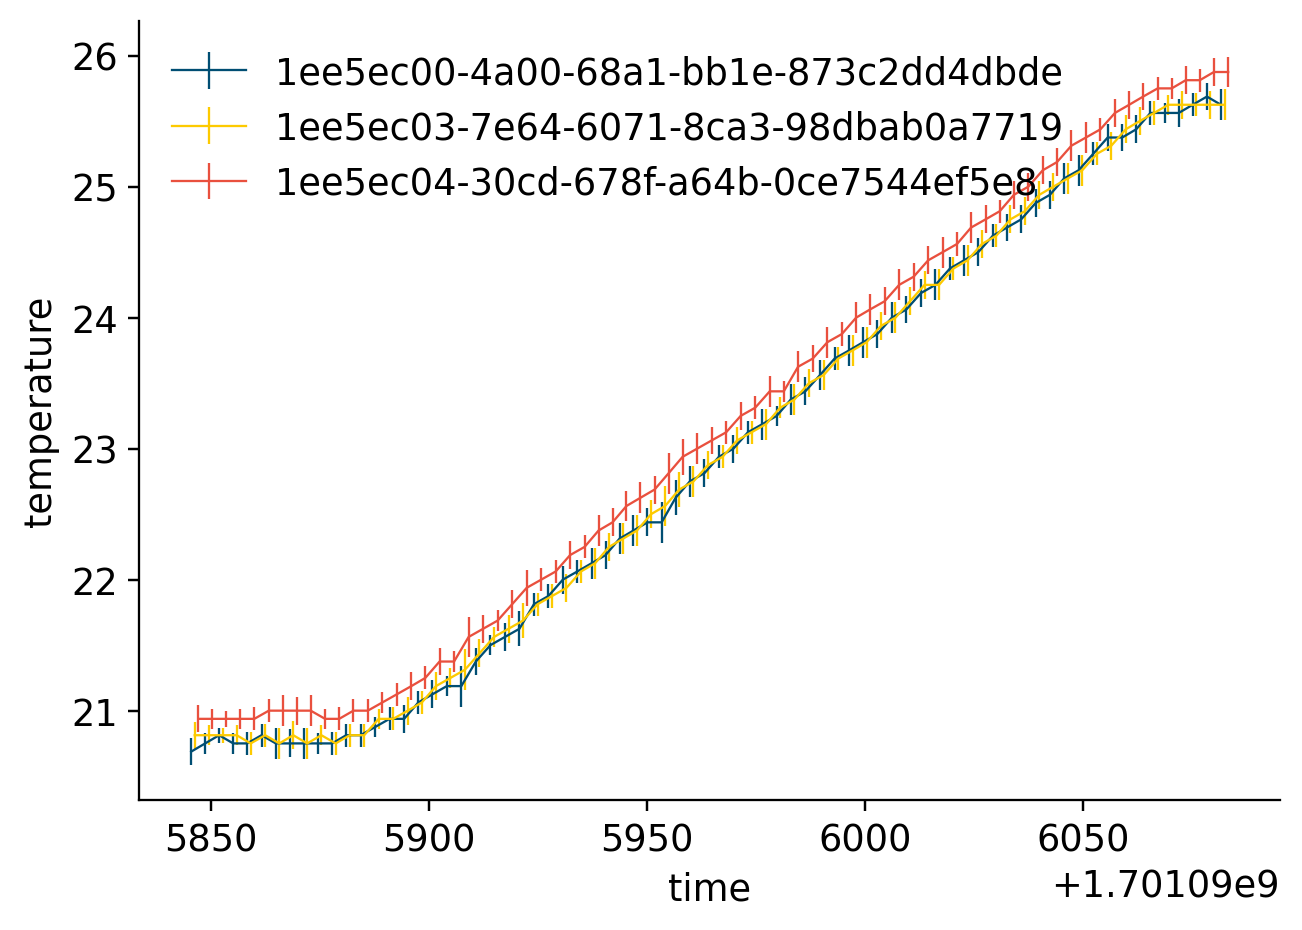

In [47]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

#plot the data
utility.plot_temp_over_time([data_dict["temperature"][index_calorimeter], mean_std_calorimeter],data_dict["timestamp"][index_calorimeter], data_dict["name"][index_calorimeter], "time", "temperature")

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [48]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.

import json # import json to open and access the json file

water_mass_path = "data/Kalorimeterkonstante99/calorimeter_1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753.json"
# open the json
with open(water_mass_path, 'r') as f:
    cal = json.load(f)
# save mass from json
water_mass = cal["calorimeter"]["medium"]["mass"]["value"]

# DONE #

In [49]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.

f = h5.File(datafile_path_const, "r") 

# create structure to access current, heat time and voltage
a = f["RawData"]
b = list(a)[0]
a = a[b]
    
b= list(a)[0]

# save current, heat time and voltage to variables
current = a["Current"][()]
heat_time = a["Time"][()]
voltage = a["Voltage"][()]

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [50]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

# save the threshold
threshold = 30/data_dict["timestamp"][0][-1]
# calculate end and start temperatures via utility
temperature_end, temperature_start = utility.get_start_end_temperature(mean_std_calorimeter[0], threshold) 
# DONE #

#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [51]:
# TODO: Calculate heat capacity of the calorimeter

# implement formula
cal_const = voltage*current*180/(temperature_end-temperature_start)
print(cal_const)
# DONE #

1966.3322033898298


#### (Vii) Ergebnis

In [53]:
print('Die Kalorimeterkonstante in kJ/kgK liegt bei')
print(cal_const)

Die Kalorimeterkonstante in kJ/kgK liegt bei
1966.3322033898298


### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [54]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

# from here on the procedure is very similar to above, so there's going to be less commentary


datafile_path_prob1 = "data/Probe001/Probe001.h5"

# DONE #

In [55]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1, "RawData")

# DONE #

In [56]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4] # another sensor was used in the bath
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [57]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

# DONE #

#### (iii) Daten ploten

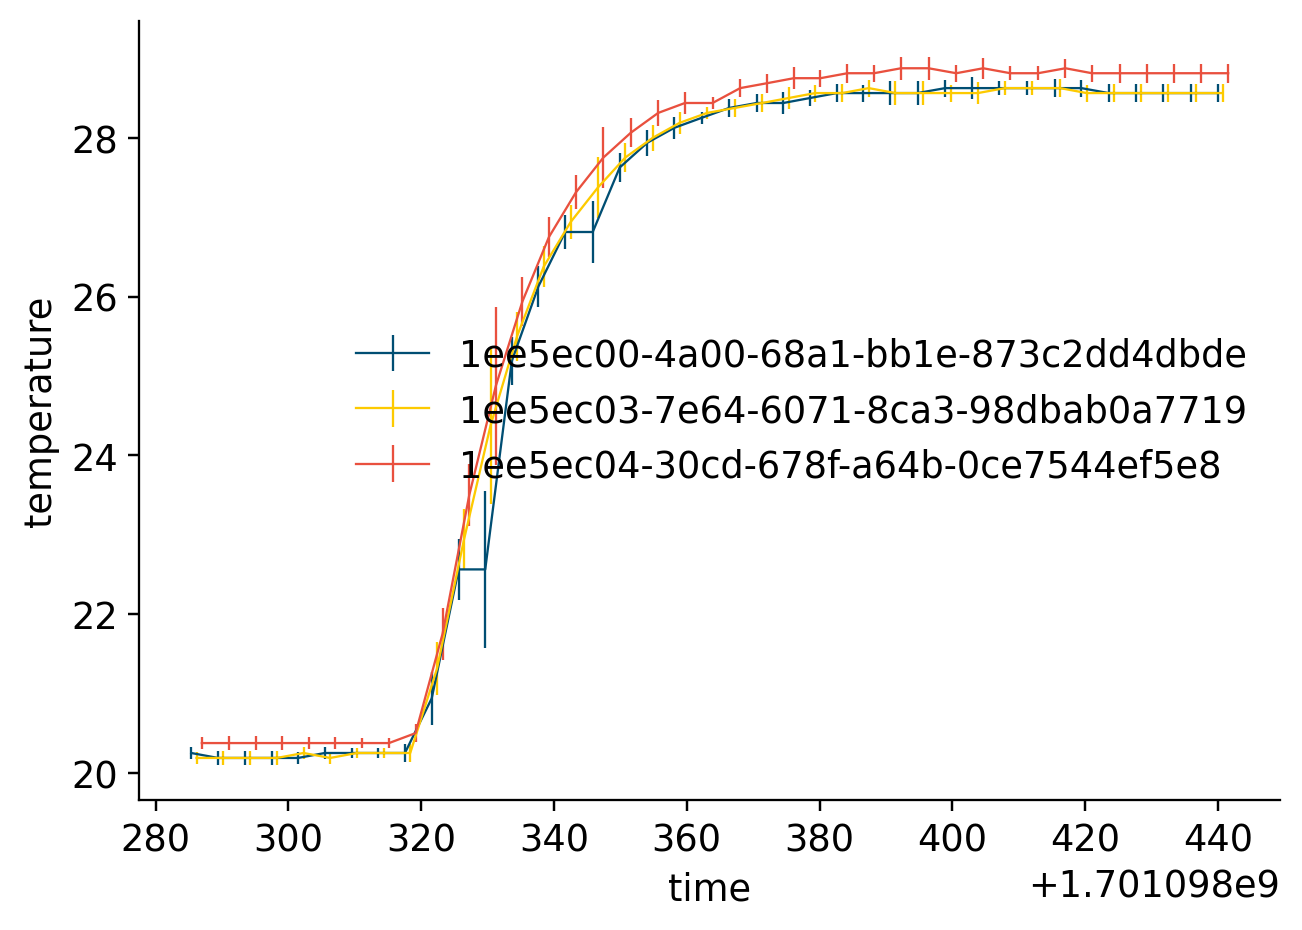

In [58]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([data_dict["temperature"][index_calorimeter], mean_std_calorimeter],data_dict["timestamp"][index_calorimeter], data_dict["name"][index_calorimeter], "time", "temperature" )


# DONE #

#### (iv) Metadaten auslesen

In [59]:
# TODO: Read mass of the sample from the metadata of the experiment.


path_p = "data/Probe001/probe_PDC001_1ee57b26-cc42-6a6e-b609-c4f6b4a81128.json"
with open(path_p, 'r') as f:
    p_mass = json.load(f)
sample_mass = p_mass["probe"]["mass"]["value"]

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [60]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
threshold = 33/data_dict["timestamp"][0][-1]
temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0], threshold) 

# DONE #

In [61]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][0:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [62]:
# TODO: Calulate specific heat capacity of the sample.

sample_mass_kg = sample_mass/1000 # mass was measured in gramms, convert to kg for formula
sample_heat_capa = calorimeter_const*(temperature_mix-temperature_start_water)/(sample_mass_kg*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [64]:
print('Die Wärmekapazität der ersten Probe in kJ/kgK liegt bei:')
print(sample_heat_capa)

Die Wärmekapazität der ersten Probe in kJ/kgK liegt bei:
516.281002798299


### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [65]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = "data/Probe010/Probe010.h5"

# DONE #

In [66]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2, "RawData")

# DONE #

In [67]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [68]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

# DONE #

#### (iii) Daten ploten

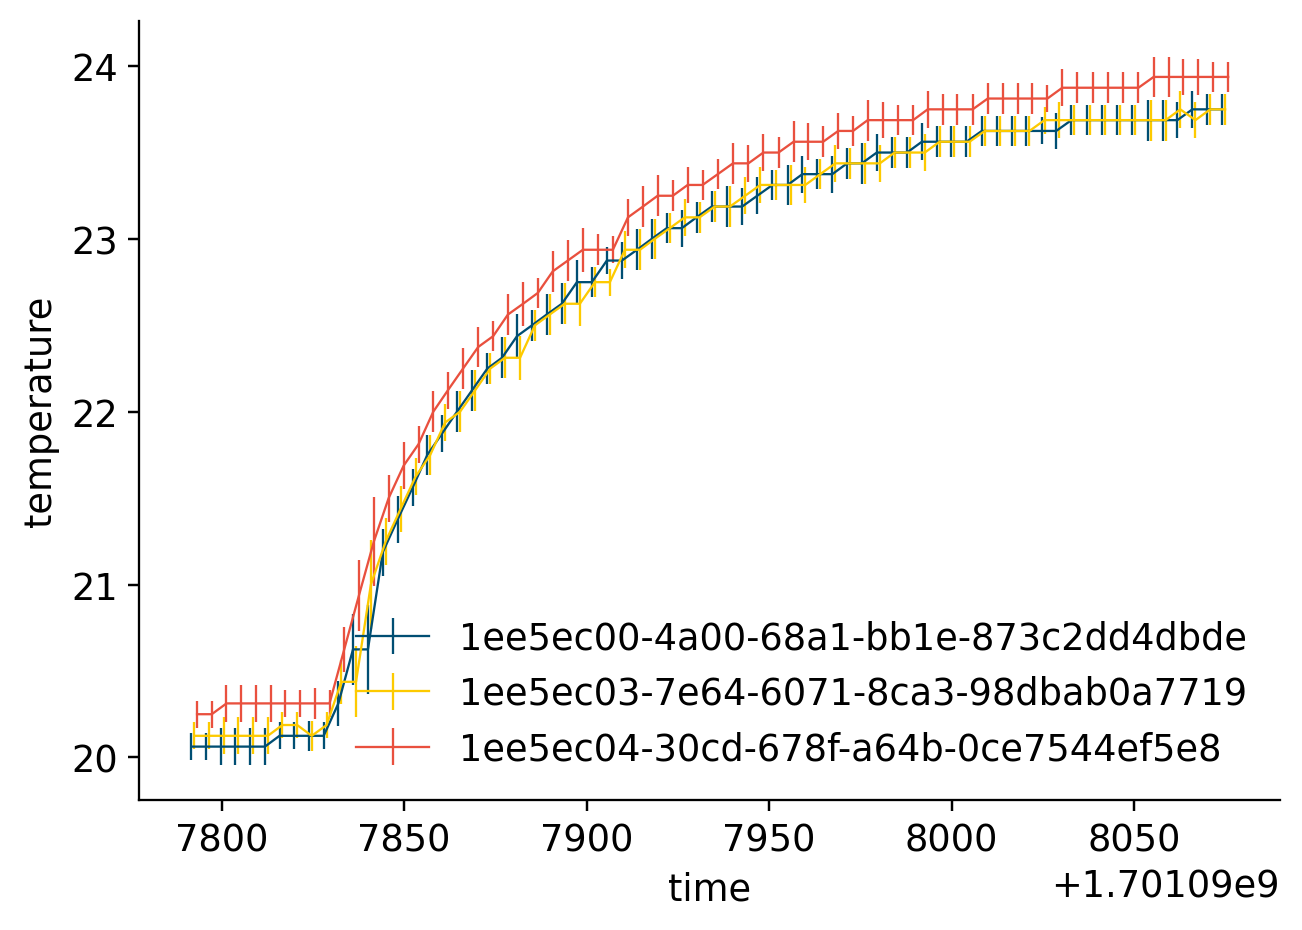

In [69]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([data_dict["temperature"][index_calorimeter], mean_std_calorimeter],data_dict["timestamp"][index_calorimeter], data_dict["name"][index_calorimeter], "time", "temperature" )


# DONE #

#### (iv) Metadaten auslesen

In [70]:
# TODO: Read mass of the sample from the metadata of the experiment.

path_p = "data/Probe010/probe_PDC010_1ee57b36-18e3-6dbc-a7dc-7a8460286908.json"
with open(path_p, 'r') as f:
    p_mass = json.load(f)
sample_mass = p_mass["probe"]["mass"]["value"]



# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [71]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

threshold = 33/data_dict["timestamp"][0][-1]
temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0], threshold) 


# DONE #

In [72]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.
temperature_start_sample = np.mean(mean_std_heater[0][0:10])


# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [73]:
# TODO: Calulate specific heat capacity of the sample.

sample_mass_kg = sample_mass/1000
sample_heat_capa = calorimeter_const*(temperature_mix-temperature_start_water)/(sample_mass_kg*(temperature_start_sample-temperature_mix))


# DONE #

#### (Vii) Ergebnis

In [74]:
print('Die Wärmekapazität der zweiten Probe in kJ/kgK liegt bei:')
print(sample_heat_capa)

Die Wärmekapazität der zweiten Probe in kJ/kgK liegt bei:
1171.6500772998218


### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [75]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = "data/Probe016/Probe016.h5"

# DONE #

In [76]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3, "RawData")

# DONE #

In [77]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [78]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

# DONE #

#### (iii) Daten ploten

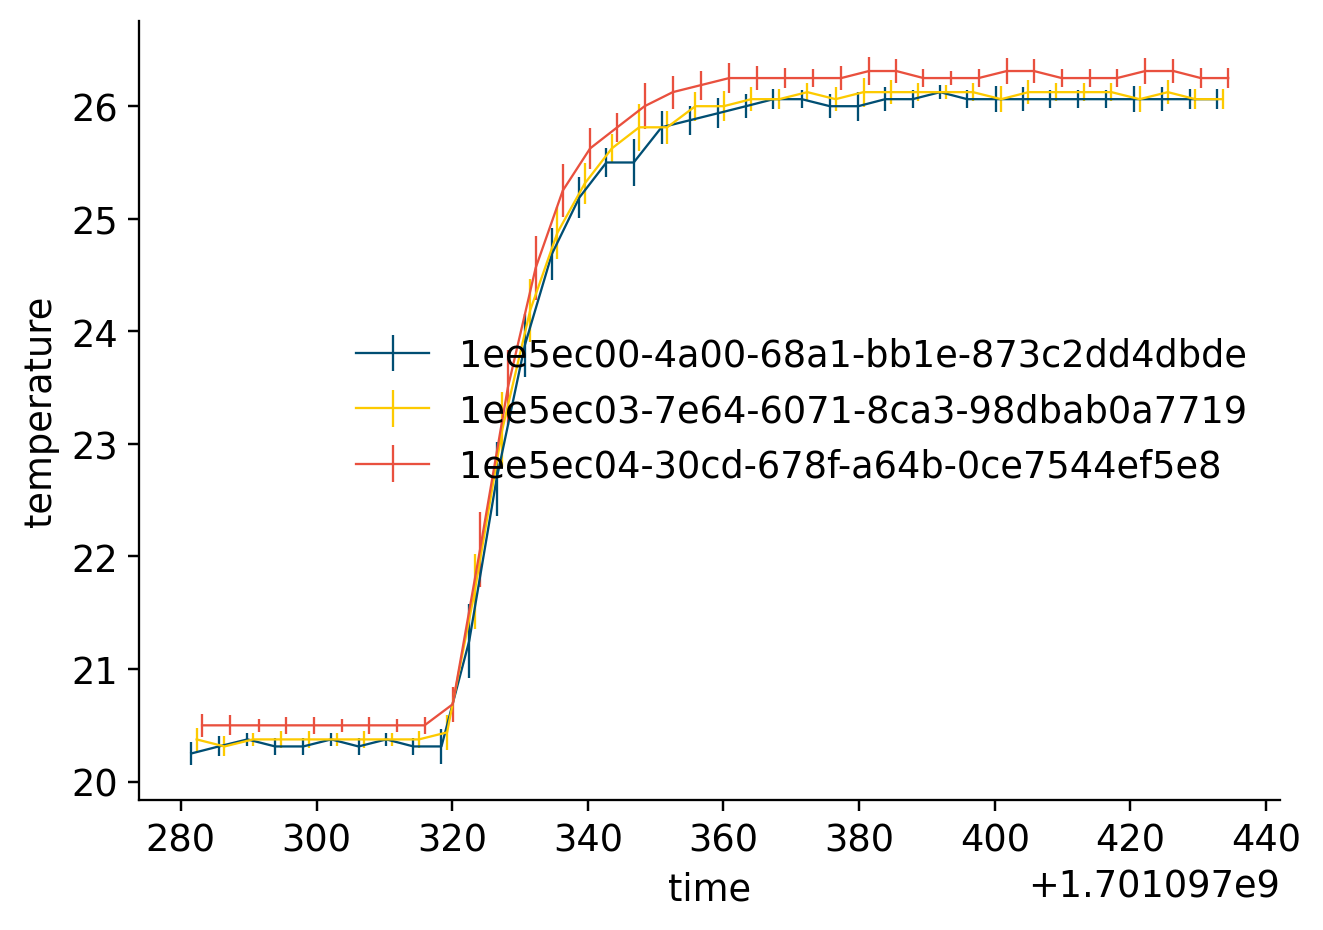

In [79]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([data_dict["temperature"][index_calorimeter], mean_std_calorimeter],data_dict["timestamp"][index_calorimeter], data_dict["name"][index_calorimeter], "time", "temperature" )


# DONE #

#### (iv) Metadaten auslesen

In [80]:
# TODO: Read mass of the sample from the metadata of the experiment.

path_p = "data/Probe016/probe_PDC016_1ee57b3c-b98a-64f2-aea5-ac942cc2bc1b.json"
with open(path_p, 'r') as f:
    p_mass = json.load(f)
sample_mass = p_mass["probe"]["mass"]["value"]



# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [81]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

threshold = 33/data_dict["timestamp"][0][-1]
temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0], threshold) 


# DONE #

In [82]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][0:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [83]:
# TODO: Calulate specific heat capacity of the sample.

sample_mass_kg = sample_mass/1000
sample_heat_capa = calorimeter_const*(temperature_mix-temperature_start_water)/(sample_mass_kg*(temperature_start_sample-temperature_mix))


# DONE #

#### (Vii) Ergebnis

In [84]:
print('Die Wärmekapazität der dritten Probe in kJ/kgK liegt bei:')
print(sample_heat_capa)

Die Wärmekapazität der dritten Probe in kJ/kgK liegt bei:
938.7496642939275


## Diskussion

Die Messungen haben ergeben, dass die Edelstahlprobe die niedrigste Wärmekapazität hat, als nächstes gefolgt von der Probe aus Aluminium und schließlich der Probe aus PVC. Nach Recherche liegen die im Versuch bestimmten Werte auch in der gleichen Größenordnung wie bekannte Referenzwerte, die Fehler lassen sich lediglich auf Messungenauigkeiten begrenzen. Die mit der Probe aus dem Heißwasserbad transportierte Wärmemenge wurde durch abtropfen vernachlässigbar gering gehalten, was durch Gewichtsmessungen des Kalorimeters bestätigt wurde. 

## Fazit

Dieser Versuch war eine der ersten tatsächlichen Laborarbeiten im Maschinenbaustudium und diese Atmosphäre kennenzulernen, war sehr hilfreich. Durch die Teamarbeit konnte außerdem effizient und zügig gearbeitet werden und auch die geringen Fehler in den Messwerten sorgen für insgesamt gute Zufriedenheit.